In [34]:
import json
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio
import statistics
import cv2
from PIL import Image
import scipy.signal as signal

In [2]:
def load_json(group,student):
    with open(f'./data/all_json/{group}_{student}.json') as f:
        return json.load(f)
    
def load_images(group,student):
    #return imageio.imread(f'./data/sequences/{group}-{student}.tif')
    return imageio.imread(f'../../{group}-{student}.nosync.tif')

In [3]:
#data = load_json(1,1)
images = load_images(9,3)

In [4]:
background = np.zeros((10,images.shape[1],images.shape[2]))
images_mean = np.mean(images,axis=3)
background[0] = np.mean(images_mean[:1],axis=(0))

for i in range(1,10):
    background[i] = np.mean(images_mean[:10*i],axis=(0))


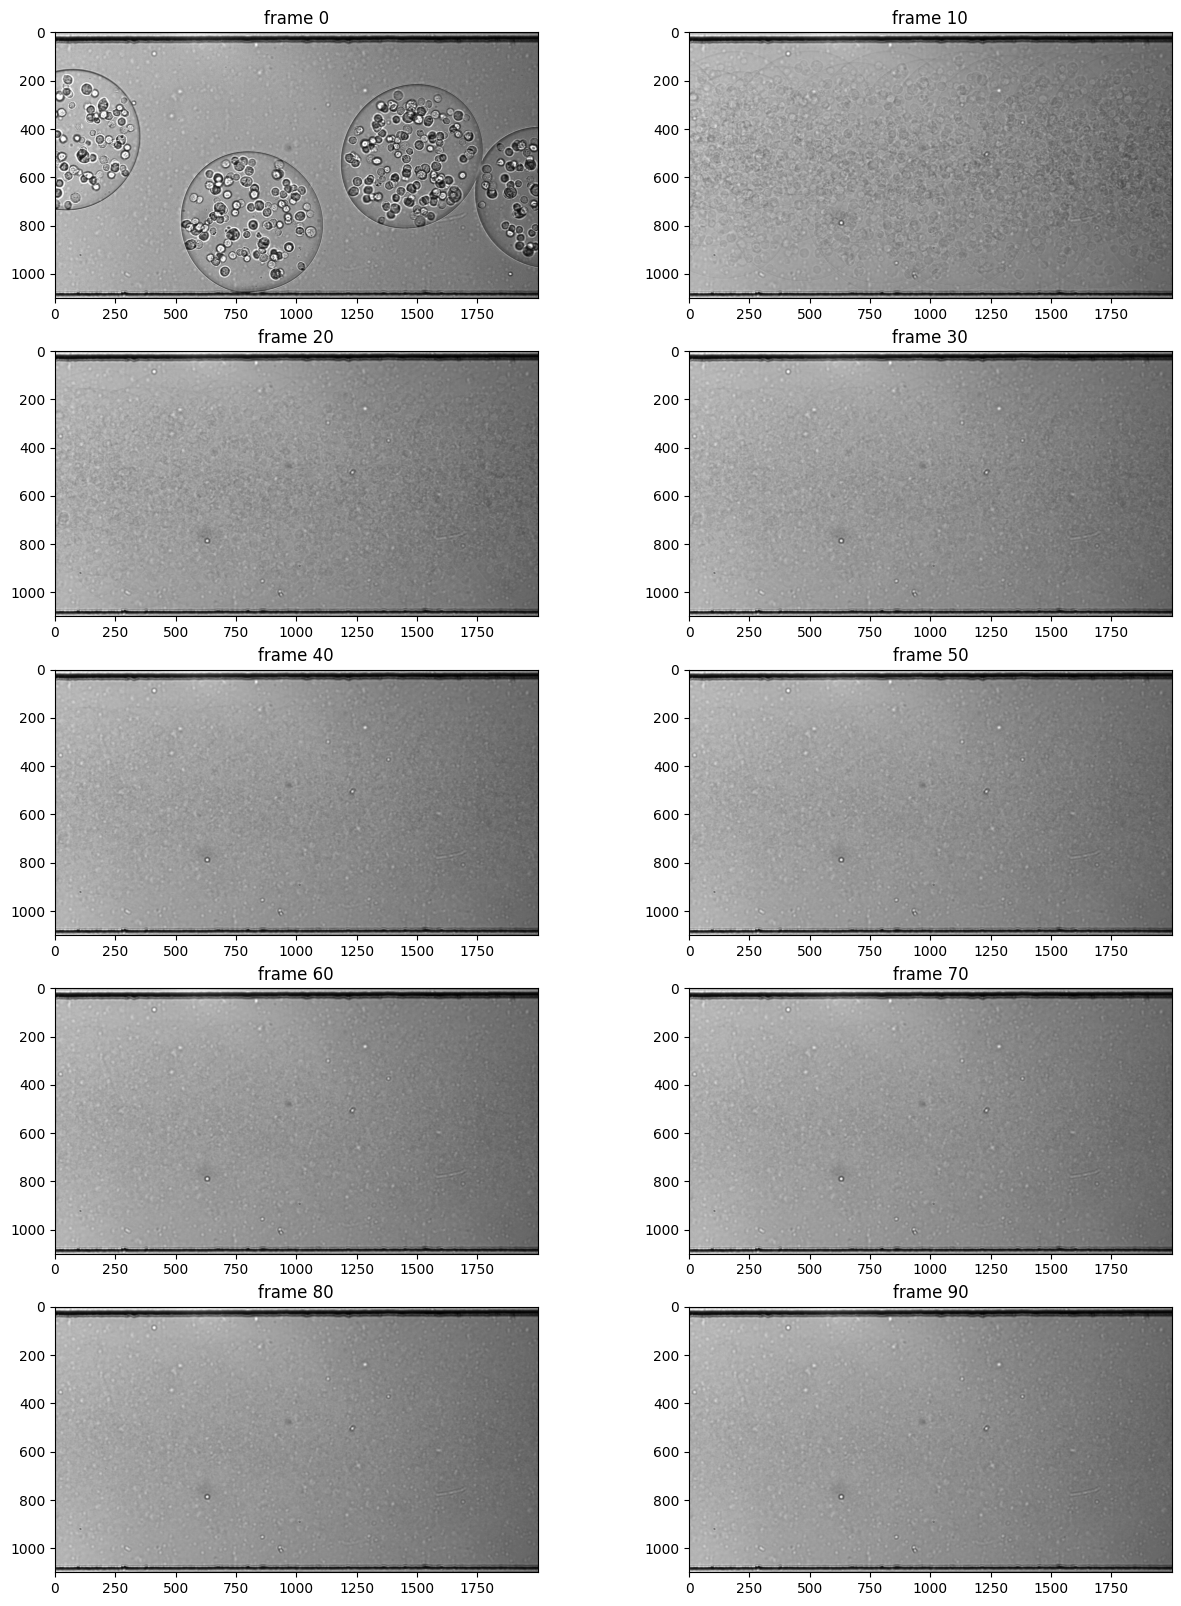

In [5]:
fig, axs = plt.subplots(5,2, figsize=(15,20))
for i in range(10):
    axs[i//2,i%2].imshow(background[i], cmap='gray')
    axs[i//2,i%2].set_title(f'frame {i*10}')
plt.show()

In [73]:
# Vibe algorithm

def vibe(image, nb_sample, min_match, threshold, samples, learning = True, learning_rate = 0.1, neighboor = True):
    
    result = np.zeros((image.shape[0],image.shape[1]),dtype=np.uint8)
    inter = np.zeros((image.shape[0],image.shape[1],nb_sample),dtype=np.uint8)
    #samples = np.zeros((image.shape[0],image.shape[1],nb_sample),dtype=np.uint8)
    distances = np.tile(image[:, :, np.newaxis], nb_sample)
    distances = np.abs(distances - samples)
    inter[distances < threshold] = 1
    result = np.sum(inter,axis=2)
    mask = result < min_match
    if learning:
        rand = np.random.rand(image.shape[0],image.shape[1])
        place = np.random.randint(0,nb_sample,(image.shape[0],image.shape[1]))
        # update background at location
        update = rand < learning_rate
        samples[update,place[update]] = image[update]
        # updeate background in neighborhood
        if neighboor:
            rand = np.random.rand(image.shape[0],image.shape[1])
            r1 = np.random.randint(-1,2)
            r2 = np.random.randint(-1,2)
            place_neighboor = np.random.randint(0,nb_sample,(image.shape[0],image.shape[1]))
            update_neighborhood = rand < learning_rate
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    if update_neighborhood[i,j]:
                        r1 = np.random.randint(-1,2)
                        if i+r1 < 0 or i+r1 >= image.shape[0]:
                            r1 = 0
                        r2 = np.random.randint(-1,2)
                        if j+r2 < 0 or j+r2 >= image.shape[1]:
                            r2 = 0
                        samples[i+r1,j+r2,place_neighboor[i,j]] = image[i,j]

    return mask,samples


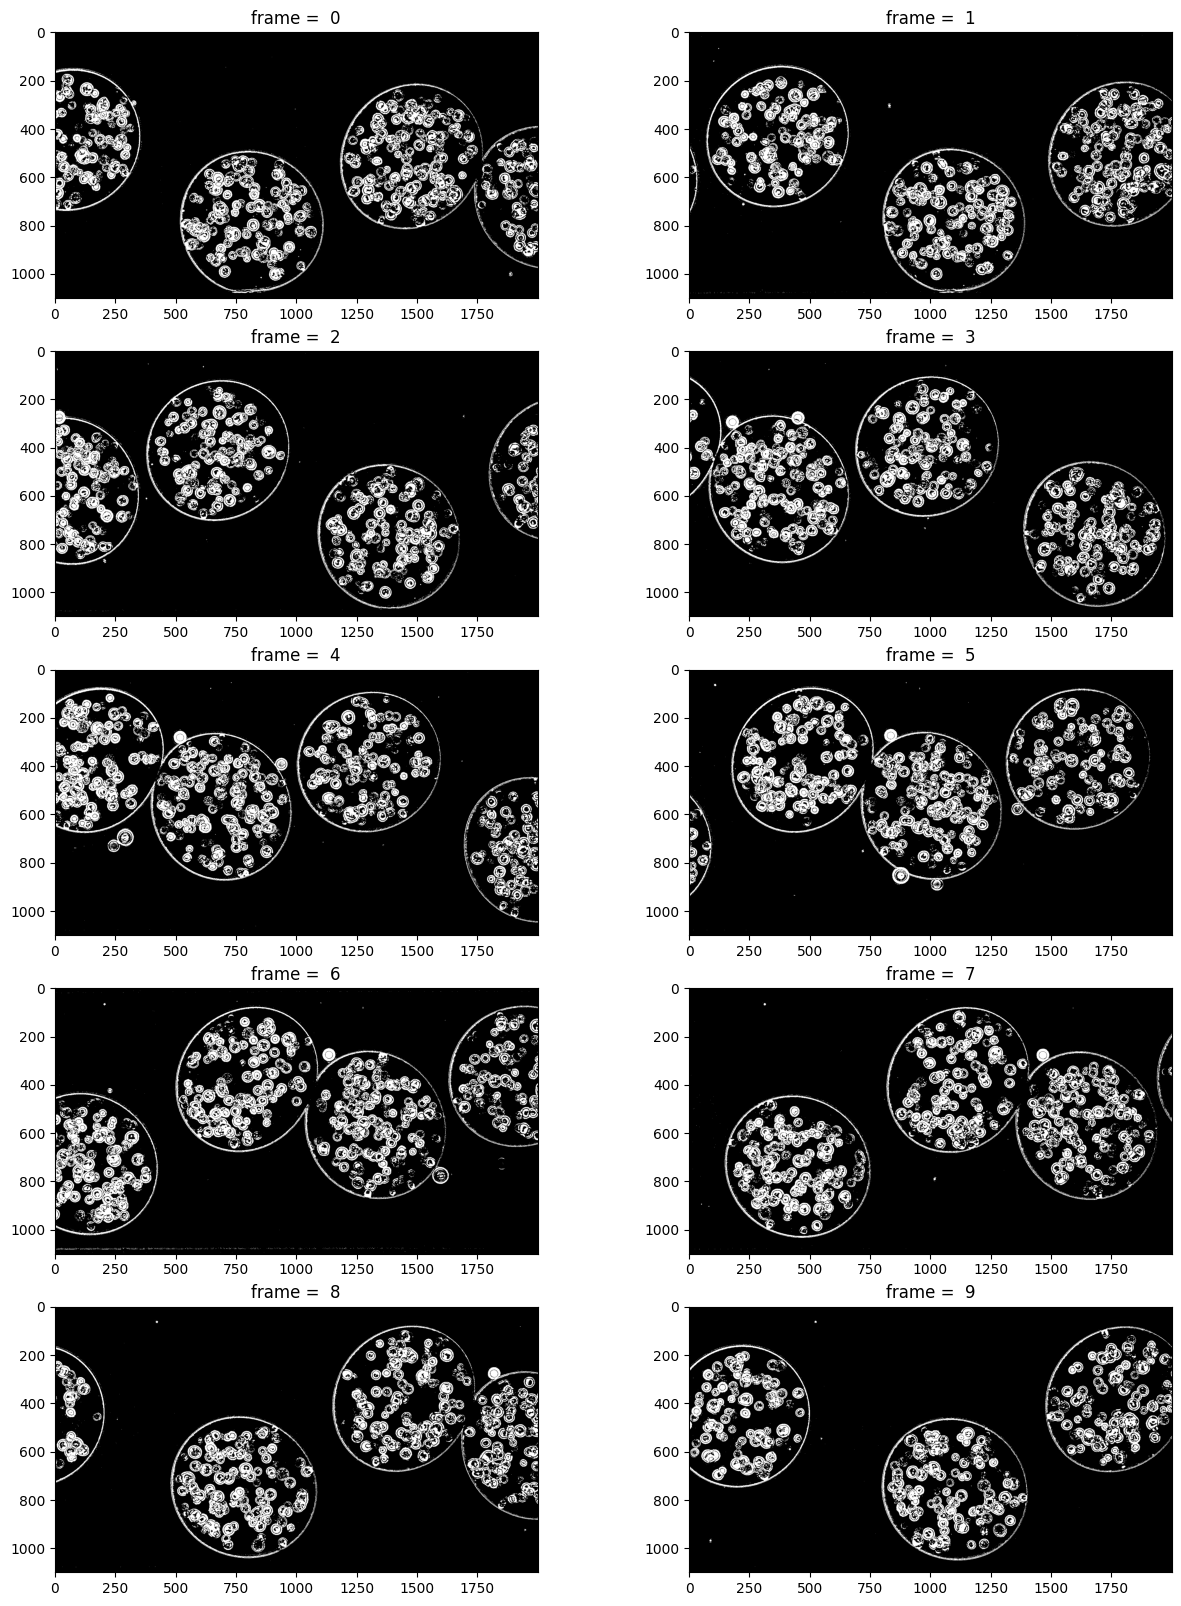

In [74]:
nb_sample = 20
mask = np.zeros((10,images.shape[1],images.shape[2]),dtype=np.uint8)
back = background[9]
samples = np.tile(back[:, :, np.newaxis], nb_sample)
for i in range(10):
    mask[i], samples = vibe(images_mean[i], nb_sample, 2, 40, samples, neighboor = False)

fig, axs = plt.subplots(5,2, figsize=(15,20))
for i in range(10):
    axs[i//2,i%2].imshow(mask[i], cmap='gray')
    axs[i//2,i%2].set_title(f'frame = {i}')

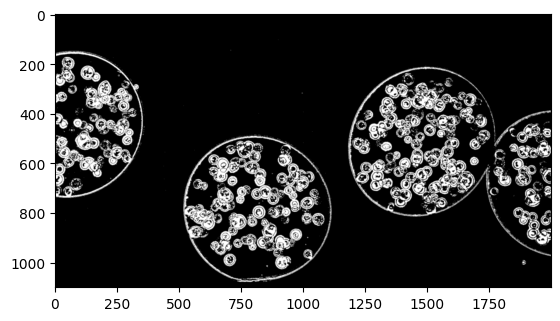

In [42]:
im_raw = mask
im_clean = np.zeros(im_raw.shape)
conv = np.array([[0,1,0],[1,0,1],[0,1,0]])
im_conv = signal.convolve2d(im_raw, conv, boundary='symm', mode='same')
im_conv = signal.convolve2d(im_conv, conv, boundary='symm', mode='same')
im_clean = np.where(im_conv>0,im_clean,0)
plt.imshow(im_conv, cmap='gray')

In [65]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
D = np.tile(A[:, :, np.newaxis], 3)
B = np.array([[1,5,2],[3,7,5],[1,10,0]])
c = B>3
print(c)
place = np.random.randint(0,3,(A.shape[0],A.shape[1]))
print(place)
D[c,place[c]] = np.zeros((3,3))[c]
#D[c] = np.zeros((3,3))[c]
print(D[1,0])


[[False  True False]
 [False  True  True]
 [False  True False]]
[[1 0 1]
 [0 1 2]
 [1 1 2]]
[4 4 4]
